# Ruchi Jha

# Logistic Regression

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

,count
household,
0,163
1,51


In [11]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household


Question 1 Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred_prob = lr.predict_proba(X_test)[:,1]

thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"Threshold: {threshold}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("-" * 20)

Threshold: 0.2
Accuracy: 0.7906976744186046
Precision: 0.6666666666666666
Recall: 0.875
--------------------
Threshold: 0.3
Accuracy: 0.813953488372093
Precision: 0.7857142857142857
Recall: 0.6875
--------------------
Threshold: 0.4
Accuracy: 0.7441860465116279
Precision: 0.7777777777777778
Recall: 0.4375
--------------------
Threshold: 0.5
Accuracy: 0.7441860465116279
Precision: 0.8571428571428571
Recall: 0.375
--------------------
Threshold: 0.6
Accuracy: 0.7441860465116279
Precision: 1.0
Recall: 0.3125
--------------------
Threshold: 0.7
Accuracy: 0.6976744186046512
Precision: 1.0
Recall: 0.1875
--------------------
Threshold: 0.8
Accuracy: 0.6744186046511628
Precision: 1.0
Recall: 0.125
--------------------


Question 2. Do the same analysis for other columns

In [18]:
elements = ['RI','Na','Mg','Si','K','Ca','Ba','Fe']
for ele in elements:
    X= np.array(glass[ele]).reshape(-1,1)
    y = glass.household

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    probs = lr.predict_proba(X_test)[:, 1]

    thresholds = [0.2,0.3, 0.4, 0.5, 0.6, 0.7,0.8]

    for threshold in thresholds:
        predictions = (probs >= threshold).astype(int)

        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        print(f"Element:{ele}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Element:RI, Threshold: 0.20, Accuracy: 0.37, Precision: 0.37, Recall: 1.00
Element:RI, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.80, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Na, Threshold: 0.20, Accuracy: 0.72, Precision: 0.62, Recall: 0.62
Element:Na, Threshold: 0.30, Accuracy: 0.77, Precision: 0.71, Recall: 0.62
Element:Na, Threshold: 0.40, Accuracy: 0.81, Precision: 0.83, Recall: 0.62
Element:Na, Threshold: 0.50, Accuracy: 0.81, Precision: 0.90, Recall: 0.56
Element:Na, Threshold: 0.60, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element:Na, Threshold: 0.70, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element:Na, Threshold: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Element:Si, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Si, Threshold: 0.80, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:K, Threshold: 0.20, Accuracy: 0.33, Precision: 0.31, Recall: 0.69
Element:K, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:K, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:K, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:K, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:K, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:K, Threshold: 0.80, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ca, Threshold: 0.20, Accuracy: 0.58, Precision: 0.46, Recall: 0.69
Element:Ca, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ca, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ca, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ca, Threshold: 0.60, Acc

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Element:Fe, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Fe, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Fe, Threshold: 0.80, Accuracy: 0.63, Precision: 0.00, Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Question 3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding).

In [21]:
X = glass.drop(['Type', 'household'], axis=1)
y = glass['household']

numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(exclude=['number']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.8837209302325582
Precision: 0.9230769230769231
Recall: 0.75


# Clustering

In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [23]:
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
cols = df.columns[:-1]

In [25]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [26]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Question 1.Repeat the above exercise for different values of k
How do the inertia and silhouette scores change?
What if you don't scale your features?
Is there a 'right' k? Why or why not?

k = 2:
Inertia: 12.143688281579719
Silhouette Score: 0.6294675561906644
k = 3:
Inertia: 7.138647703985377
Silhouette Score: 0.48247222154221125
k = 4:
Inertia: 5.5416577630824975
Silhouette Score: 0.4435001045329514
k = 5:
Inertia: 4.9997160154877855
Silhouette Score: 0.4222535372081206
k = 6:
Inertia: 4.07029077328491
Silhouette Score: 0.3405866709081262
k = 7:
Inertia: 3.510433507793471
Silhouette Score: 0.35277326166631884
k = 8:
Inertia: 3.16487027131338
Silhouette Score: 0.33931875602507316
k = 9:
Inertia: 2.815190267731449
Silhouette Score: 0.3193794548863887
k = 10:
Inertia: 2.6165346380115833
Silhouette Score: 0.3120887868485293


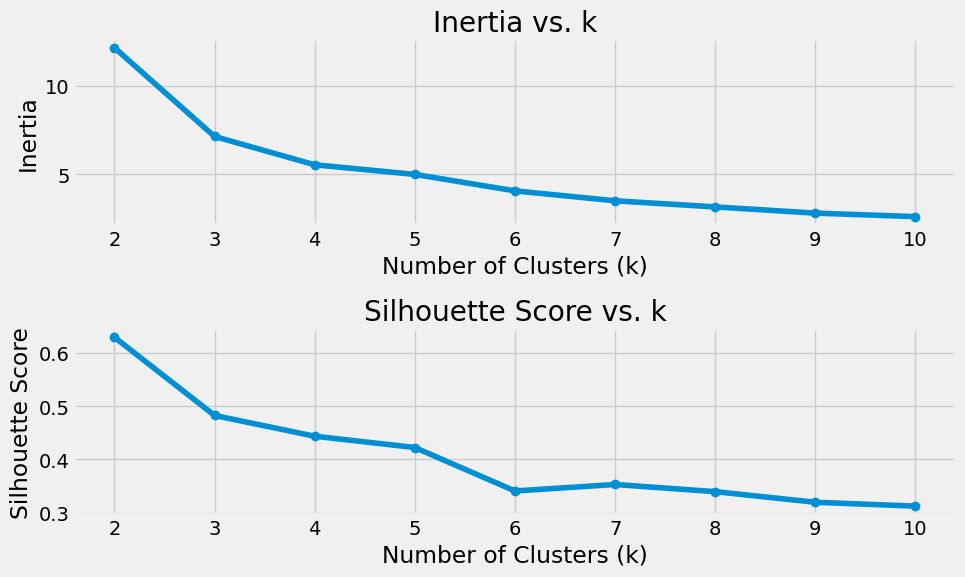

In [36]:
import matplotlib.pyplot as plt
inertia_scores = []
silhouette_scores = []
k_values = range(2, 11)  # Test k values from 2 to 10

for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(X_scaled)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    inertia_scores.append(inertia)
    silhouette = metrics.silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette)

    print(f"k = {k}:")
    print(f"Inertia: {inertia}")
    print(f"Silhouette Score: {silhouette}")

# Plotting the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(k_values, inertia_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. k')

plt.subplot(2, 1, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')

plt.tight_layout()
plt.show()

As we test different values of **k**, we observe that the **inertia** decreases steadily with each additional cluster. This is expected, as adding more clusters allows the KMeans algorithm to better fit the data, reducing the overall distance between points and their respective cluster centers. However, this reduction slows down after a certain point, which we often refer to as the "elbow" in the plot. In this case, while inertia continues to drop with higher **k**, the sharpest improvement levels off around **k = 6**.

Looking at the **silhouette score**, which measures how distinct and well-separated the clusters are, we notice that it **peaks at k = 6**. This indicates that the clusters formed with six groups are not only compact but also well-separated from one another—suggesting a natural grouping in the data at this level. Beyond six clusters, the silhouette score begins to drop, meaning that the additional clusters may be creating fragmentation rather than clarity.

If we hadn’t scaled our features before running KMeans, this pattern likely wouldn't have been as clear. Features with larger numerical ranges would have overpowered those with smaller ones, distorting the distance calculations and leading to poor clustering quality. As a result, both inertia and silhouette scores would have become less meaningful, and **k = 6** might not have emerged as the best choice.

So, is **k = 6** the "right" number of clusters? Based on both the inertia elbow and the silhouette peak, it appears to be a strong candidate. But it’s important to remember that the "right" k isn't just about the metrics—it also depends on the problem you're solving. If six clusters make sense in your context and lead to actionable insights, then it's a good choice. Metrics can guide you, but interpretation and domain understanding ultimately determine what's best.

